In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sp
from scipy.optimize import curve_fit

¿Qué unidades debe tener τ?

La unidad de una resistencia denotada como [R] es el OHM que suele abreviarse con la letra griega Ω y la unidad de la inductancia [L] es el Henrio que se abrevia con la letra H. Entonces, τ se mide en Ω/H. El H puede expresarse como Ω.s, quedando finalmente que [τ] es 1/s. Esto permite cancelar la unidad de tiempo para que el exponente sea adimensional.  

Importar los datos a un dataframe de Pandas.

In [ ]:
df = pd.read_excel("sample_data/RL_Circ.xlsx")

print(df)

    time (ns)  voltage (volts)  uncertainty (volts)
0         0.0           5.0800              0.11200
1        32.8           3.2900              0.09040
2        65.6           2.2300              0.07430
3        98.4           1.4800              0.06050
4       131.2           1.1100              0.05250
5       164.0           0.6440              0.04000
6       196.8           0.4760              0.03430
7       229.6           0.2730              0.02600
8       262.4           0.1880              0.02160
9       295.2           0.1410              0.01870
10      328.0           0.0942              0.01530
11      360.8           0.0768              0.01380
12      393.6           0.0322              0.00894
13      426.4           0.0322              0.00894
14      459.2           0.0198              0.00701
15      492.0           0.0198              0.00701


Opcional, converitr a arrays de Numpy los datos.

In [ ]:
COL1 = df["time (ns)"].to_numpy()
COL2 = df["voltage (volts)"].to_numpy()
COL3 = df["uncertainty (volts)"].to_numpy()

print(COL1 , COL2 , COL3)

[  0.   32.8  65.6  98.4 131.2 164.  196.8 229.6 262.4 295.2 328.  360.8
 393.6 426.4 459.2 492. ] [5.08   3.29   2.23   1.48   1.11   0.644  0.476  0.273  0.188  0.141
 0.0942 0.0768 0.0322 0.0322 0.0198 0.0198] [0.112   0.0904  0.0743  0.0605  0.0525  0.04    0.0343  0.026   0.0216
 0.0187  0.0153  0.0138  0.00894 0.00894 0.00701 0.00701]


Hacer un gráfico de dispersión de  Vi(t)=V(t)=V0e−τ t  que incluya las incertezas como barras de error

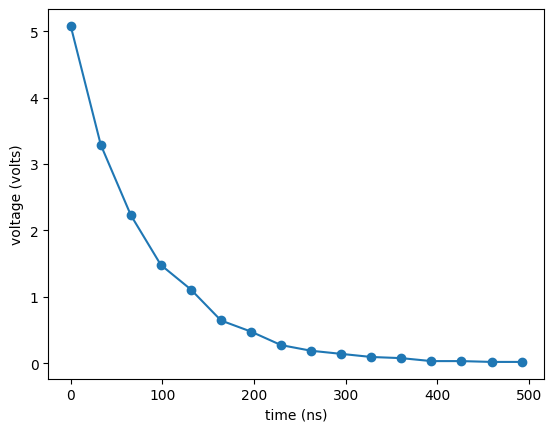

In [ ]:
plt.figure(1)
plt.scatter(COL1,COL2)
plt.plot(COL1,COL2)
plt.xlabel("time (ns)")
plt.ylabel("voltage (volts)")



plt.show()

Gráfico con errores.

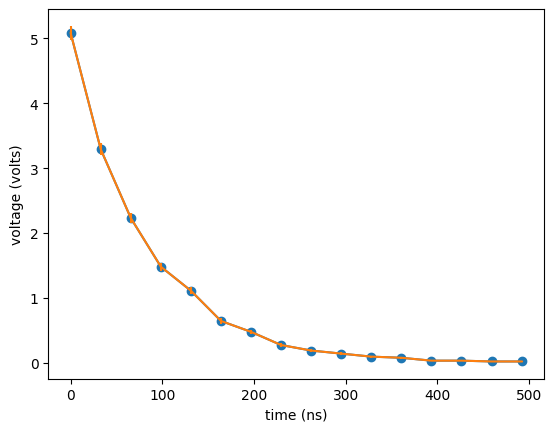

In [ ]:
plt.figure(1)
plt.scatter(COL1,COL2)
plt.plot(COL1,COL2)
plt.errorbar(COL1,COL2,COL3)
plt.xlabel("time (ns)")
plt.ylabel("voltage (volts)")
plt.show()

Encontrar los valores que mejor ajustan a  V0  y  τ  usando scipy.optimize

In [ ]:
x = COL1
y = COL2

def func(x,a,b):
  return a*np.exp(-b*x)

param, cov = curve_fit(func,x,y)

print(param)

[5.08 1.  ]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Hacer un gráfico de la curva con los parámetros encontrados desde el ajuste

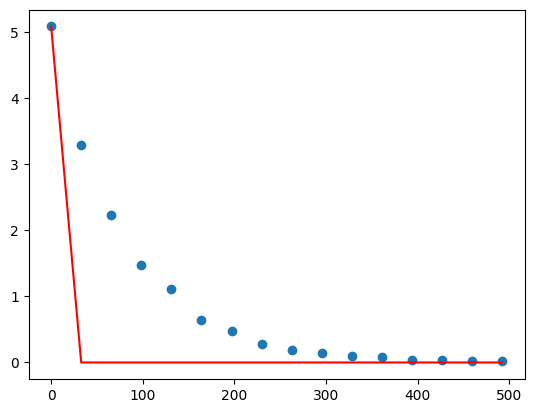

In [ ]:
a = 5.08
b = 1
plt.figure(2)
plt.scatter(COL1,COL2)
plt.plot(x,func(x,a,b), c= "r")

plt.show()

¿Cambia algo si uno da valores estimados iniciales para los parámetros que se buscan?(especialmente para  τ )

Si Tau estuviera mas cercano al valor 0.012 la curva se ajustaria mucho mejor que con el parametro encontrado anteriormente.

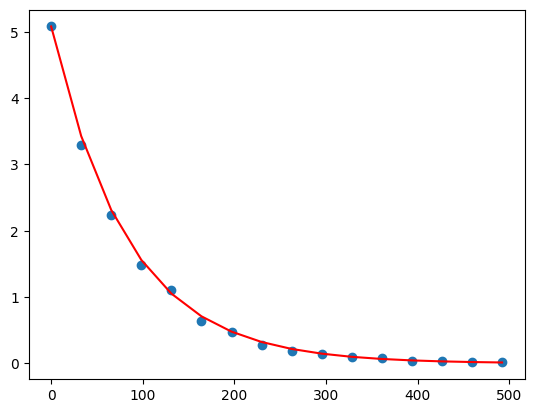

In [ ]:
a = 5.08
b = 0.012
plt.figure(2)
plt.scatter(COL1,COL2)
plt.plot(x,func(x,a,b), c= "r")

plt.show()

Los valores encontrados para  τ  ¿Concuerdan con lo que se observa en el gráfico inicial?

No concuerdan, ya que la curva ajusta mejor con valores cercanos al encontrado en el inciso anterior, que se encuentran mas cercanos al 0 que al 1 que fue el hallado como parametro.

Si la resistencia tiene un valor de 10  kΩ  ¿Cuál es el valor de la inductancia?

Teniendo presente que τ = R/L , entonces L = R/τ. Se realizan las cuentas con τ = 1 y con τ = 0.012.

In [ ]:
tau = 1
R = 10000

L = R/tau

print(L)

10000.0


In [ ]:
tau = 0.012
R = 10000

L = R/tau

print(round(L,1))

833333.3


Los valores encontrados para  V0  ¿Concuerdan con lo que se observa en el gráfico inicial?

Si.

Hacer un ajuste de los datos linearizando los mismos y encontrar los parámetros  V0  y  τ  nuevamente ¿Son los resultados consistentes con lo que encontró antes?

In [ ]:
x = COL1
y = COL2

def func(x,a,b):
  return a*np.exp(-b*x)

param, cov = curve_fit(func,x,y,p0=[5.08,0.012])

print(param)

[5.0386261  0.01232256]


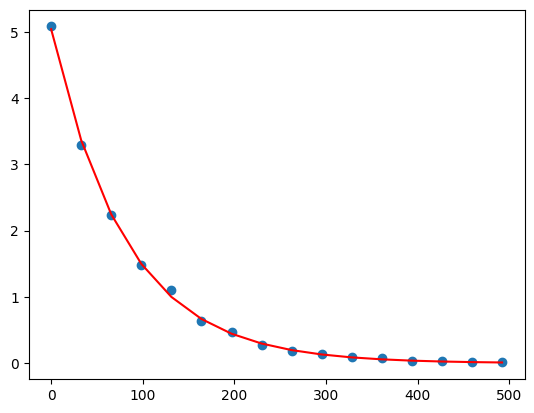

In [ ]:
a = 5.0386261
b = 0.01232256
plt.figure(3)
plt.scatter(COL1,COL2)

plt.plot(x,func(x,a,b), c = "r")

plt.show()
